In [1]:
import sys
sys.path.append('/Users/lindsaybassman/Documents/LBL/ArQTiC')
from arqtic.simulation_generator import Simulation_Generator
import matplotlib.pyplot as plt
import numpy as np
import qiskit as qk
from qiskit import Aer, IBMQ, execute
import random
import qsearch

In [37]:
#create simulation object
sim_obj = Simulation_Generator("QITE_input.txt")
N = sim_obj.num_spins

In [38]:
print(sim_obj.beta)
print(sim_obj.delta_beta)

6.4
0.64


In [39]:
#connect to IBM
#if this is your first run enter your API key
#sim_obj.connect_IBM(api_key="c2629e2a2595c888d4b84e5fc15e8756ccf2e3af6f5eb7525beaee93ce017ecb7581cf3c74c8de44a88b2a554ecc7d82be52ac9e358430de782be155e4586195")

In [40]:
#generate circuits
sim_obj.generate_programs()

Creating IBM quantum circuit objects...
IBM quantum circuit objects created


In [41]:
#get results
energies = sim_obj.qite_energies

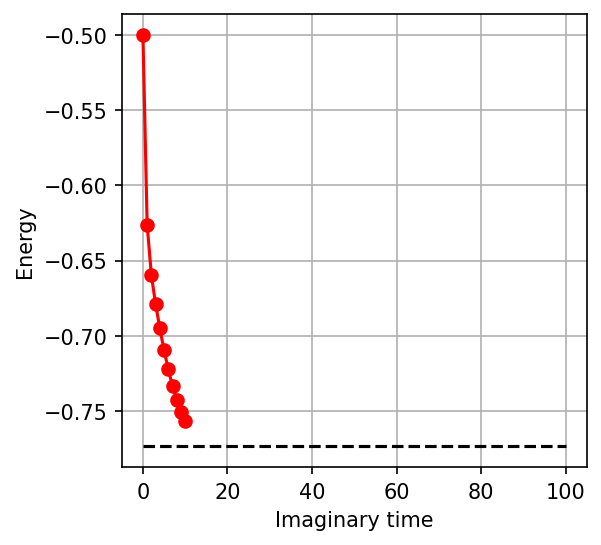

In [42]:
plt.figure(figsize=[4,4], dpi=150)
#plt.plot(np.arange(0,num_beta+1)*dbeta,E,'-ro',label='QITE')
plt.plot(energies,'-ro')
#plt.axhline(y=w[0], color='k',linestyle='--',label="Ground state")
#plt.title("QITE")
plt.xlabel("Imaginary time")
plt.ylabel("Energy")
#plt.hlines(-1.4865556615119306, 0, 12, color="black", linestyles='dashed') #2qubits
#plt.hlines(-1.025094662244868, 0, 100, color="black", linestyles='dashed') #3qubits Jz=0.5, mu_x=0.1
#plt.hlines(-1.1064874717544295, 0, 100, color="black", linestyles='dashed') #3qubits Jz=0.5, mu_x=0.2
plt.hlines(-0.7735294660091737, 0, 100, color="black", linestyles='dashed') #3qubits Jz=0.5, mu_x=0.3
plt.grid()
#plt.xlim(0,10)

#plt.legend(bbox_to_anchor=(1.0,1.0))
plt.show()
#plt.savefig('QITE_GSenergy.png')

In [43]:
print(energies)

[-0.5, -0.6263263069028178, -0.6598303352530164, -0.6789457188976414, -0.6951287003413449, -0.709590018048349, -0.722328795365587, -0.7333113260733635, -0.7425944232442134, -0.750309586395306, -0.7566319329383582]


In [44]:
ibm_qite_circ = sim_obj.ibm_circuits_list[0]
print(ibm_qite_circ)
unitary_sim = Aer.get_backend('unitary_simulator')
job = execute(ibm_qite_circ, unitary_sim)
result = job.result()


     ┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
q_0: ┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├»
     │  unitary ││  unitary ││  unitary ││  unitary ││  unitary ││  unitary │»
q_1: ┤1         ├┤1         ├┤1         ├┤1         ├┤1         ├┤1         ├»
     └──────────┘└──────────┘└──────────┘└──────────┘└──────────┘└──────────┘»
c: 2/════════════════════════════════════════════════════════════════════════»
                                                                             »
«     ┌──────────┐┌──────────┐┌──────────┐┌──────────┐
«q_0: ┤0         ├┤0         ├┤0         ├┤0         ├
«     │  unitary ││  unitary ││  unitary ││  unitary │
«q_1: ┤1         ├┤1         ├┤1         ├┤1         ├
«     └──────────┘└──────────┘└──────────┘└──────────┘
«c: 2/════════════════════════════════════════════════
«                                                     


In [45]:
prog_qite_unitary = np.eye(2**N)
for gate in sim_obj.programs_list[0].gates:
    prog_qite_unitary = np.matmul(gate.matrix(), prog_qite_unitary)
print(prog_qite_unitary)

[[ 0.91438239+0.j -0.02247666+0.j -0.02247666+0.j  0.40360185+0.j]
 [-0.10432892+0.j  0.95109448+0.j -0.04890552+0.j  0.28660604+0.j]
 [-0.10432892+0.j -0.04890552+0.j  0.95109448+0.j  0.28660604+0.j]
 [-0.37700902+0.j -0.30417486+0.j -0.30417486+0.j  0.82025575+0.j]]


In [46]:
ibm_qite_unitary = result.get_unitary(ibm_qite_circ, decimals=16)
print(ibm_qite_unitary)

[[ 0.91438239+0.j -0.02247666+0.j -0.02247666+0.j  0.40360185+0.j]
 [-0.10432892+0.j  0.95109448+0.j -0.04890552+0.j  0.28660604+0.j]
 [-0.10432892+0.j -0.04890552+0.j  0.95109448+0.j  0.28660604+0.j]
 [-0.37700902+0.j -0.30417486+0.j -0.30417486+0.j  0.82025575+0.j]]


In [47]:
temp = np.matmul(np.conj(np.transpose(ibm_qite_unitary)), prog_qite_unitary)
print(1 - ( np.abs( np.trace( temp ) ) / ( 2 ** 2 ) ))

-2.220446049250313e-16


In [48]:
ibm_qite_unitary_rev = qsearch.utils.endian_reverse(ibm_qite_unitary, d=8)

In [49]:
print(ibm_qite_unitary_rev)
print(ibm_qite_unitary)

[[ 0.91438239+0.j -0.02247666+0.j -0.02247666+0.j  0.40360185+0.j]
 [-0.10432892+0.j  0.95109448+0.j -0.04890552+0.j  0.28660604+0.j]
 [-0.10432892+0.j -0.04890552+0.j  0.95109448+0.j  0.28660604+0.j]
 [-0.37700902+0.j -0.30417486+0.j -0.30417486+0.j  0.82025575+0.j]]
[[ 0.91438239+0.j -0.02247666+0.j -0.02247666+0.j  0.40360185+0.j]
 [-0.10432892+0.j  0.95109448+0.j -0.04890552+0.j  0.28660604+0.j]
 [-0.10432892+0.j -0.04890552+0.j  0.95109448+0.j  0.28660604+0.j]
 [-0.37700902+0.j -0.30417486+0.j -0.30417486+0.j  0.82025575+0.j]]


In [70]:
psi = np.transpose([0,0,0,1])

In [71]:
qite_psi = np.dot(prog_qite_unitary, psi)
print(qite_psi)

[0.40360185+0.j 0.28660604+0.j 0.28660604+0.j 0.82025575+0.j]


In [72]:
#Pauli matrices
sx = np.array([[0, 1], [1, 0]])
sy = np.array([[0, -1j], [1j, 0]])
sz = np.array([[1, 0], [0, -1]])
Jz = sim_obj.Jz
mu_x = sim_obj.h_ext
hinit = np.zeros((2**N, 2**N), dtype=np.complex128)
hinit+=-Jz*np.kron(sz,sz)
hinit+=-mu_x*np.kron(sx,np.eye(2))
hinit+=-mu_x*np.kron(np.eye(2),sx)
#hinit+=-Jz*np.kron(np.eye(2),np.kron(sz,sz))
#hinit+=-Jz*np.kron(np.kron(sz,sz),np.eye(2))
#hinit+=-mu_x*np.kron(sx,np.kron(np.eye(2),np.eye(2)))
#hinit+=-mu_x*np.kron(np.eye(2),np.kron(sx,np.eye(2)))
#hinit+=-mu_x*np.kron(np.eye(2),np.kron(np.eye(2),sx))

In [73]:
obs = np.dot(np.transpose(np.conj(qite_psi)), np.dot(hinit, qite_psi))

In [74]:
print(obs)

(-0.7566319329383578+0j)
